### Q1. Develop a committee of deep learning models on the Fashion MNIST dataset and compare their combined performance against individual models, using various metrics including confusion matrices and classification reports

**Task 1. Data Exploration & Preparation:
Exploration: Visualize a sample of images from each class in the Fashion MNIST dataset.
Normalization: Scale the images to have pixel values between [0,1].
Data Formatting: Convert labels to one-hot encoded vector**

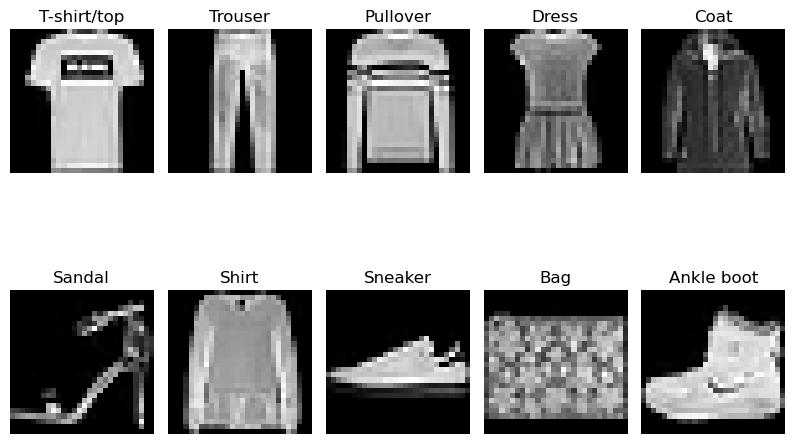

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names for Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(10, 6))  # Adjust figure height for better spacing
for i in range(10):
    idx = np.where(train_labels == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[idx], cmap="gray")
    plt.title(class_names[i])
    plt.axis("off")

# Reduce vertical space between rows
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

# Normalize and reshape images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images for CNN input
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
train_labels_categorical = to_categorical(train_labels, 10)
test_labels_categorical = to_categorical(test_labels, 10)


**Task 2: Model Development
Model 1: Design a shallow neural network. Explain the choice of layers and activations.
Model 2: Construct a basic convolutional neural network (CNN).
Model 3: Build a deeper CNN**

In [8]:
from tensorflow.keras import layers, models
from tensorflow.keras import Input

# Model 1: Shallow Neural Network
def build_shallow_nn():
    model = models.Sequential([
        Input(shape=(28, 28, 1)),  # Define input shape with Input layer
        layers.Flatten(),           # Flatten the input images
        layers.Dense(128, activation="relu"),  # Dense hidden layer with 128 neurons
        layers.Dense(64, activation="relu"),   # Another hidden layer with 64 neurons
        layers.Dense(10, activation="softmax") # Output layer with 10 classes, softmax activation
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Model 2: Basic CNN
def build_basic_cnn():
    model = models.Sequential([
        Input(shape=(28, 28, 1)),  # Define input shape with Input layer
        layers.Conv2D(32, (3, 3), activation="relu"),  # Convolutional layer
        layers.MaxPooling2D((2, 2)),  # Max-pooling layer to downsample
        layers.Flatten(),              # Flatten the image to 1D vector
        layers.Dense(64, activation="relu"),  # Dense layer with 64 neurons
        layers.Dense(10, activation="softmax")  # Output layer
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Model 3: Deeper CNN
def build_deep_cnn():
    model = models.Sequential([
        Input(shape=(28, 28, 1)),  # Define input shape with Input layer
        layers.Conv2D(64, (3, 3), activation="relu"),  # First Conv Layer
        layers.BatchNormalization(),  # Batch normalization
        layers.MaxPooling2D((2, 2)),  # Max pooling
        layers.Conv2D(128, (3, 3), activation="relu"),  # Second Conv Layer
        layers.BatchNormalization(),  # Batch normalization
        layers.MaxPooling2D((2, 2)),  # Max pooling
        layers.Conv2D(256, (3, 3), activation="relu"),  # Third Conv Layer
        layers.BatchNormalization(),  # Batch normalization
        layers.Flatten(),  # Flatten the image to 1D
        layers.Dense(256, activation="relu"),  # Fully connected layer
        layers.Dropout(0.5),  # Dropout for regularization
        layers.Dense(128, activation="relu"),  # Another fully connected layer
        layers.Dropout(0.5),  # Dropout for regularization
        layers.Dense(10, activation="softmax")  # Output layer
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

**Task 3: Training & Validation:
Train each model, recording loss and accuracy metrics over epochs.
Use validation data to monitor performance and avoid overfitting.
Save the best weights for each model**

In [11]:
# Train each model
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a callback for saving the best weights with .keras extension
def get_best_weights_callback(model_name):
    return ModelCheckpoint(
        f'{model_name}_best_weights.keras',  # Save path for the model weights with .keras extension
        save_best_only=True,  # Only save the model if it improves
        monitor='val_loss',  # Monitor the validation loss to determine the best model
        mode='min',  # We want to minimize the validation loss
        verbose=1  # Print a message when saving the best weights
    )

# Train each model and save the best weights

# Model 1: Shallow Neural Network
shallow_nn = build_shallow_nn()
shallow_nn_best_weights_callback = get_best_weights_callback('shallow_nn')
shallow_nn_history = shallow_nn.fit(
    train_images, 
    train_labels_categorical, 
    epochs=100, 
    validation_split=0.1, 
    verbose=2,
    callbacks=[shallow_nn_best_weights_callback]  # Include the callback
)

# Model 2: Basic CNN
basic_cnn = build_basic_cnn()
basic_cnn_best_weights_callback = get_best_weights_callback('basic_cnn')
basic_cnn_history = basic_cnn.fit(
    train_images, 
    train_labels_categorical, 
    epochs=100, 
    validation_split=0.1, 
    verbose=2,
    callbacks=[basic_cnn_best_weights_callback]  # Include the callback
)

# Model 3: Deeper CNN
deep_cnn = build_deep_cnn()
deep_cnn_best_weights_callback = get_best_weights_callback('deep_cnn')
deep_cnn_history = deep_cnn.fit(
    train_images, 
    train_labels_categorical, 
    epochs=100, 
    validation_split=0.1, 
    verbose=2,
    callbacks=[deep_cnn_best_weights_callback]  # Include the callback
)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.37974, saving model to shallow_nn_best_weights.keras
1688/1688 - 5s - 3ms/step - accuracy: 0.8204 - loss: 0.5010 - val_accuracy: 0.8628 - val_loss: 0.3797
Epoch 2/100

Epoch 2: val_loss improved from 0.37974 to 0.36797, saving model to shallow_nn_best_weights.keras
1688/1688 - 2s - 1ms/step - accuracy: 0.8645 - loss: 0.3681 - val_accuracy: 0.8655 - val_loss: 0.3680
Epoch 3/100

Epoch 3: val_loss improved from 0.36797 to 0.36526, saving model to shallow_nn_best_weights.keras
1688/1688 - 3s - 2ms/step - accuracy: 0.8785 - loss: 0.3324 - val_accuracy: 0.8718 - val_loss: 0.3653
Epoch 4/100

Epoch 4: val_loss improved from 0.36526 to 0.32900, saving model to shallow_nn_best_weights.keras
1688/1688 - 3s - 2ms/step - accuracy: 0.8844 - loss: 0.3113 - val_accuracy: 0.8828 - val_loss: 0.3290
Epoch 5/100

Epoch 5: val_loss improved from 0.32900 to 0.32681, saving model to shallow_nn_best_weights.keras
1688/1688 - 2s - 1ms/step - accuracy: 0.8

**Task 4: Model Evaluation:
Assess each model's performance on the test data, reporting accuracy. Construct a committee by averaging predictions of the three models. Report on the combined accuracy of the committee.**


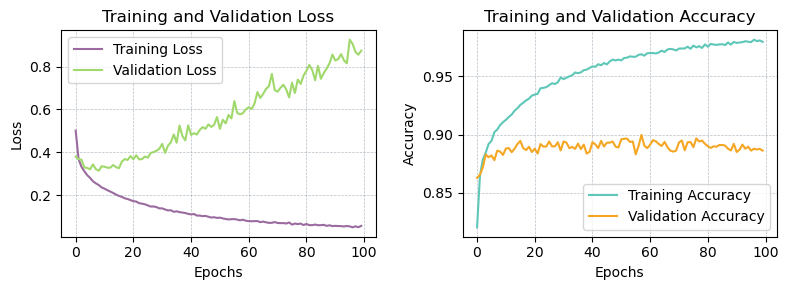

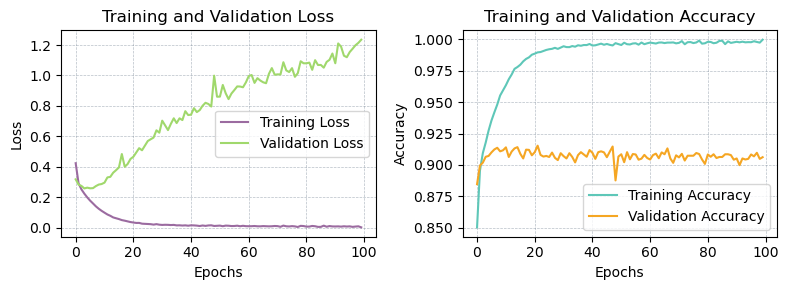

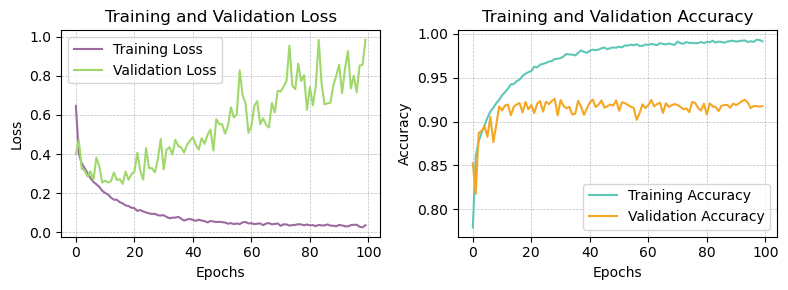

In [27]:
# funtion for training curve plotting
def plot_training_curves(history):
    plt.figure(figsize=(8, 3))

    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='#9B6BA0', linestyle='-', linewidth=1.5)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='#A0D86C', linestyle='-', linewidth=1.5)
    plt.xlabel('Epochs', fontsize=10)
    plt.ylabel('Loss', fontsize=10)
    plt.title('Training and Validation Loss', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(color='slategray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Accuracy curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='#5EC7B8', linestyle='-', linewidth=1.5)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#F5A623', linestyle='-', linewidth=1.5)
    plt.xlabel('Epochs', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.title('Training and Validation Accuracy', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(color='slategray', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot the training curves
plot_training_curves(shallow_nn_history)
plot_training_curves(basic_cnn_history)
plot_training_curves(deep_cnn_history)

In [29]:
from sklearn.metrics import accuracy_score

# Evaluate each model on test data
shallow_nn_accuracy = shallow_nn.evaluate(test_images, test_labels_categorical, verbose=2)[1]
basic_cnn_accuracy = basic_cnn.evaluate(test_images, test_labels_categorical, verbose=2)[1]
deep_cnn_accuracy = deep_cnn.evaluate(test_images, test_labels_categorical, verbose=2)[1]

print(f"Shallow NN accuracy: {shallow_nn_accuracy:.3f}")
print(f"Basic CNN accuracy: {basic_cnn_accuracy:.3f}")
print(f"Deep CNN accuracy: {deep_cnn_accuracy:.3f}")

# Ensemble committee by averaging predictions
predictions_shallow_nn = shallow_nn.predict(test_images)
predictions_basic_cnn = basic_cnn.predict(test_images)
predictions_deep_cnn = deep_cnn.predict(test_images)

committee_predictions = (predictions_shallow_nn + predictions_basic_cnn + predictions_deep_cnn) / 3
committee_labels = np.argmax(committee_predictions, axis=1)

# Compute and print committee accuracy
true_labels = np.argmax(test_labels_categorical, axis=1)  # Convert categorical labels to class indices
committee_accuracy = accuracy_score(true_labels, committee_labels)

print(f"Committee accuracy: {committee_accuracy:.3f}")

313/313 - 1s - 3ms/step - accuracy: 0.8817 - loss: 1.0036
313/313 - 2s - 5ms/step - accuracy: 0.9077 - loss: 1.2801
313/313 - 5s - 17ms/step - accuracy: 0.9148 - loss: 1.0342
Shallow NN accuracy: 0.882
Basic CNN accuracy: 0.908
Deep CNN accuracy: 0.915
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
Committee accuracy: 0.925


**Task 5: Performance Metrics & Analysis:
Generate and visualize confusion matrices for each model and the committee.
Generate classification reports, comparing precision, recall, and F1-scores. Comment on the strengths and weaknesses of each model, focusing on which classes are most often misclassified.**


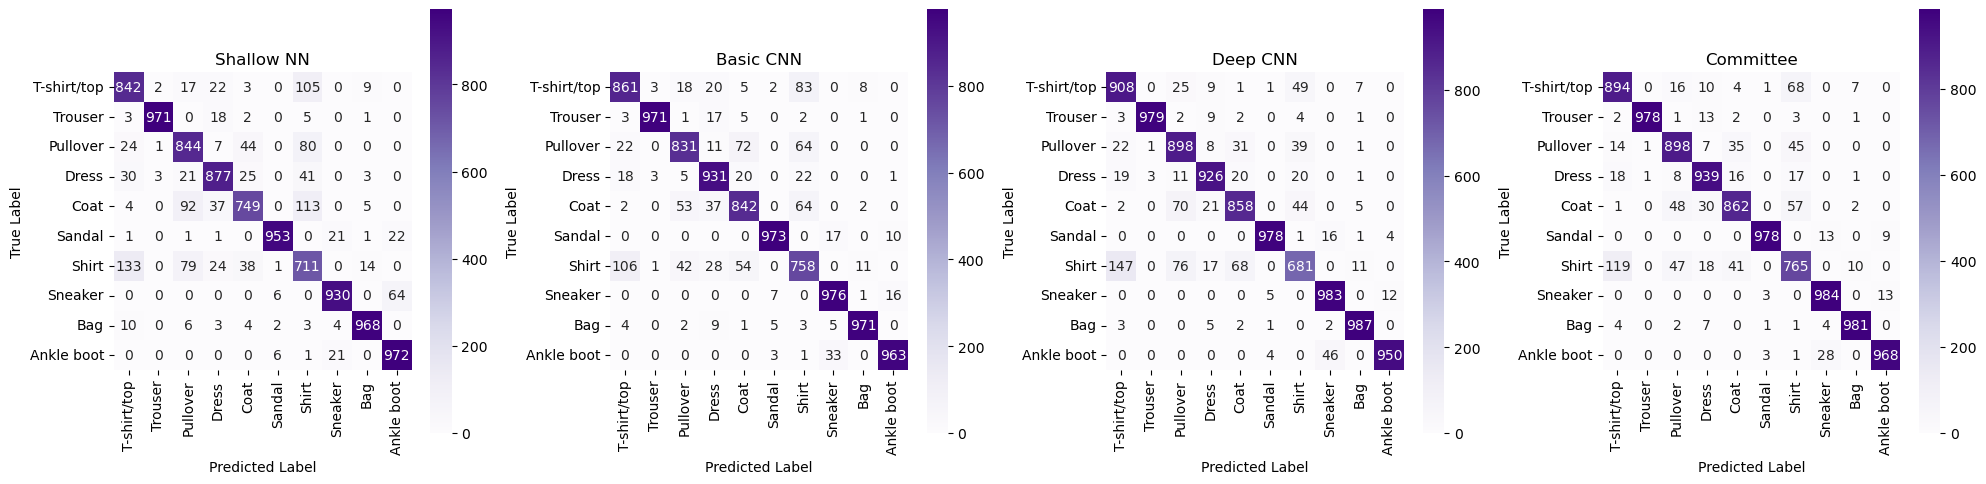


Classification Report for Shallow NN:
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.84      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.84      0.82      1000
       Dress       0.89      0.88      0.88      1000
        Coat       0.87      0.75      0.80      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.67      0.71      0.69      1000
     Sneaker       0.95      0.93      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.92      0.97      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Classification Report for Basic CNN:
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
 

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrices side by side
def plot_confusion_matrices(conf_matrices, titles, labels):
    fig, axes = plt.subplots(1, len(conf_matrices), figsize=(20, 5))  # Create subplots side by side
    for i, ax in enumerate(axes):
        sns.heatmap(conf_matrices[i], annot=True, fmt="d", cmap="Purples", 
                    xticklabels=labels, yticklabels=labels, square=True, ax=ax)
        ax.set_title(titles[i])
        ax.set_xlabel("Predicted Label")
        ax.set_ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Generate predictions for individual models
shallow_nn_labels = np.argmax(predictions_shallow_nn, axis=1)
basic_cnn_labels = np.argmax(predictions_basic_cnn, axis=1)
deep_cnn_labels = np.argmax(predictions_deep_cnn, axis=1)

# Compute confusion matrices
conf_matrix_shallow_nn = confusion_matrix(test_labels, shallow_nn_labels)
conf_matrix_basic_cnn = confusion_matrix(test_labels, basic_cnn_labels)
conf_matrix_deep_cnn = confusion_matrix(test_labels, deep_cnn_labels)
conf_matrix_committee = confusion_matrix(test_labels, committee_labels)

# Titles for each confusion matrix
titles = ["Shallow NN", "Basic CNN", "Deep CNN", "Committee"]

# Plot confusion matrices side by side
plot_confusion_matrices(
    [conf_matrix_shallow_nn, conf_matrix_basic_cnn, conf_matrix_deep_cnn, conf_matrix_committee],
    titles,
    class_names
)

# Print classification report for the committee model
# Generate classification reports for individual models and the committee model
class_report_shallow_nn = classification_report(test_labels, shallow_nn_labels, target_names=class_names)
class_report_basic_cnn = classification_report(test_labels, basic_cnn_labels, target_names=class_names)
class_report_deep_cnn = classification_report(test_labels, deep_cnn_labels, target_names=class_names)
class_report_committee = classification_report(test_labels, committee_labels, target_names=class_names)

# Print classification reports
print("\nClassification Report for Shallow NN:")
print(class_report_shallow_nn)
print("\nClassification Report for Basic CNN:")
print(class_report_basic_cnn)
print("\nClassification Report for Deep CNN:")
print(class_report_deep_cnn)
print("\nClassification Report for Committee:")
print(class_report_committee)

**Extra Task:
Implement techniques to enhance model performance: data augmentation, dropout, batch normalisation, etc. Explore ensemble techniques beyond simple averaging, e.g., weighted averaging based on validation performance.**


C:\Users\mettu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.74689, saving model to shallow_nn_best_weights.keras
844/844 - 47s - 56ms/step - accuracy: 0.5731 - loss: 1.1527 - val_accuracy: 0.7373 - val_loss: 0.7469
Epoch 2/100

Epoch 2: val_loss improved from 0.74689 to 0.70228, saving model to shallow_nn_best_weights.keras
844/844 - 43s - 51ms/step - accuracy: 0.6545 - loss: 0.9218 - val_accuracy: 0.7290 - val_loss: 0.7023
Epoch 3/100

Epoch 3: val_loss improved from 0.70228 to 0.66837, saving model to shallow_nn_best_weights.keras
844/844 - 44s - 53ms/step - accuracy: 0.6756 - loss: 0.8577 - val_accuracy: 0.7462 - val_loss: 0.6684
Epoch 4/100

Epoch 4: val_loss improved from 0.66837 to 0.66806, saving model to shallow_nn_best_weights.keras
844/844 - 42s - 50ms/step - accuracy: 0.6883 - loss: 0.8211 - val_accuracy: 0.7530 - val_loss: 0.6681
Epoch 5/100

Epoch 5: val_loss improved from 0.66806 to 0.61881, saving model to shallow_nn_best_weights.keras
844/844 - 43s - 50ms/step - accuracy: 0.6

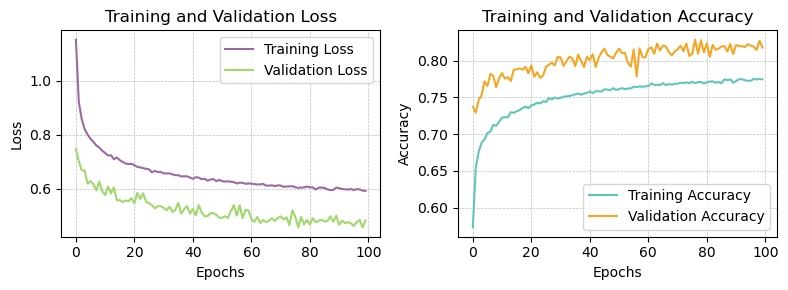

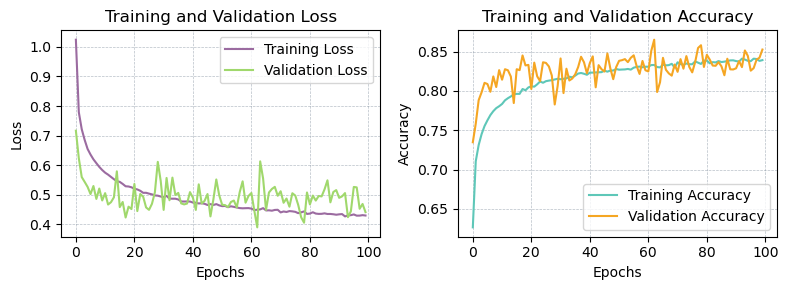

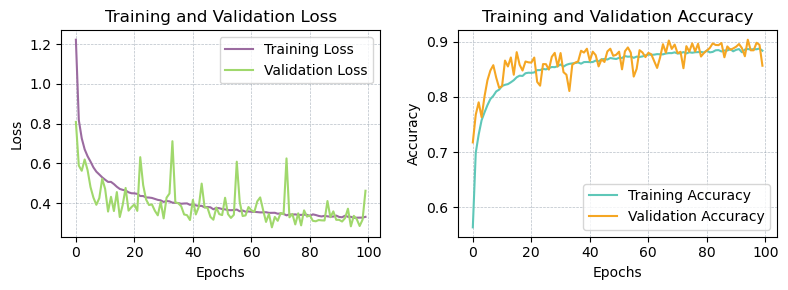

313/313 - 1s - 2ms/step - accuracy: 0.8047 - loss: 0.5137
313/313 - 1s - 4ms/step - accuracy: 0.8361 - loss: 0.4847
313/313 - 3s - 10ms/step - accuracy: 0.8532 - loss: 0.4803
Shallow NN accuracy: 0.805
Basic CNN accuracy: 0.836
Deep CNN accuracy: 0.853
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Committee Accuracy (Weighted Ensemble): 0.878


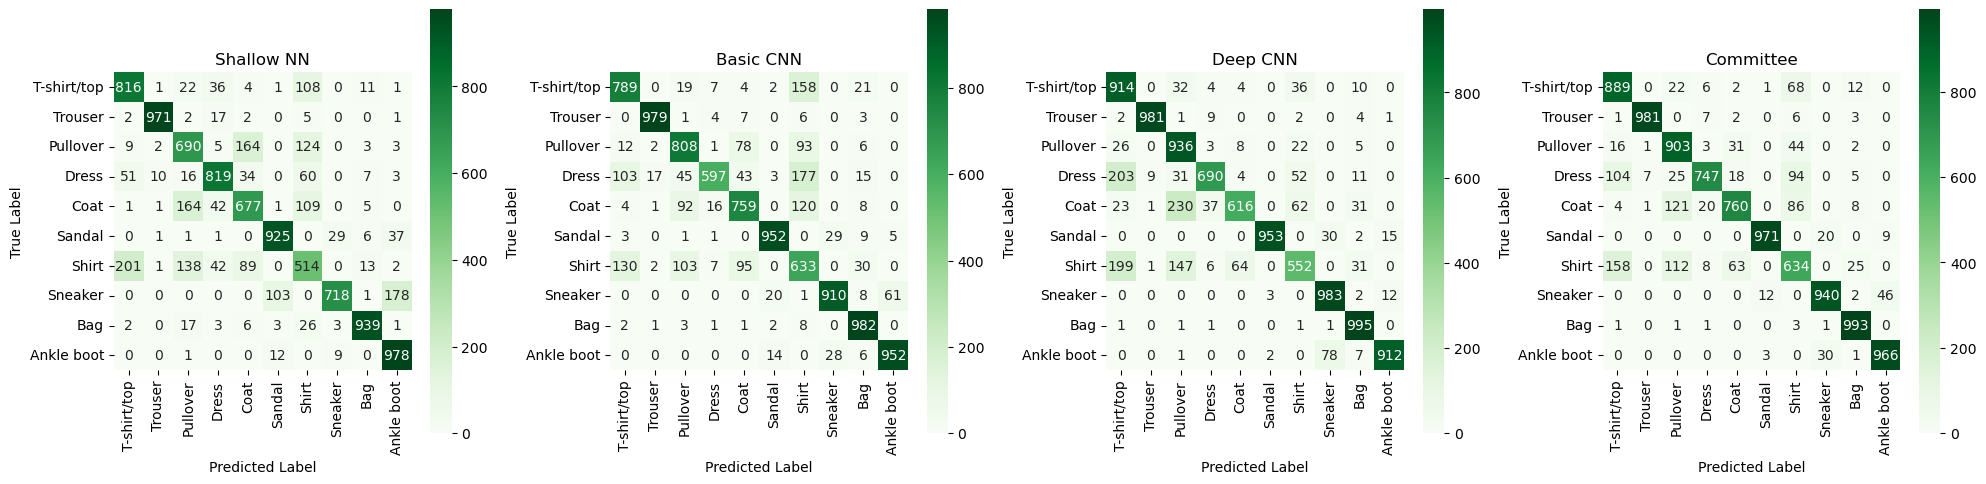

Classification Report for Shallow NN:
              precision    recall  f1-score   support

 T-shirt/top       0.75      0.82      0.78      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.66      0.69      0.67      1000
       Dress       0.85      0.82      0.83      1000
        Coat       0.69      0.68      0.69      1000
      Sandal       0.89      0.93      0.90      1000
       Shirt       0.54      0.51      0.53      1000
     Sneaker       0.95      0.72      0.82      1000
         Bag       0.95      0.94      0.95      1000
  Ankle boot       0.81      0.98      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000


Classification Report for Basic CNN:
              precision    recall  f1-score   support

 T-shirt/top       0.76      0.79      0.77      1000
     Trouser       0.98      0.98      0.98      1000
  

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score


# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Rescale images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add channel dimension to images (needed for CNNs)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
train_labels_categorical = to_categorical(train_labels, 10)
test_labels_categorical = to_categorical(test_labels, 10)

# Data Augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(train_images)

# Manually split train data into train and validation sets
validation_split = 0.1
val_size = int(len(train_images) * validation_split)

# Split the data
val_images = train_images[:val_size]
val_labels = train_labels_categorical[:val_size]
train_images_split = train_images[val_size:]
train_labels_split = train_labels_categorical[val_size:]

# Model 1: Shallow Neural Network
from tensorflow.keras import layers, models

def build_shallow_nn():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Model 2: Basic CNN
def build_basic_cnn():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),  # Input layer specifying the shape
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Model 3: Deeper CNN 
def build_deep_cnn():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Callback for saving the best weights with .keras extension
def get_best_weights_callback(model_name):
    return ModelCheckpoint(
        f'{model_name}_best_weights.keras',
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        verbose=1
    )

# Train each model and save best weights
shallow_nn = build_shallow_nn()
shallow_nn_best_weights_callback = get_best_weights_callback('shallow_nn')
shallow_nn_history = shallow_nn.fit(
    datagen.flow(train_images_split, train_labels_split, batch_size=64),  # Use data augmentation during training
    epochs=100,
    validation_data=(val_images, val_labels),  # Manually pass validation data
    verbose=2,
    callbacks=[shallow_nn_best_weights_callback]
)

basic_cnn = build_basic_cnn()
basic_cnn_best_weights_callback = get_best_weights_callback('basic_cnn')
basic_cnn_history = basic_cnn.fit(
    datagen.flow(train_images_split, train_labels_split, batch_size=64),
    epochs=100,
    validation_data=(val_images, val_labels),  # Manually pass validation data
    verbose=2,
    callbacks=[basic_cnn_best_weights_callback]
)

deep_cnn = build_deep_cnn()
deep_cnn_best_weights_callback = get_best_weights_callback('deep_cnn')
deep_cnn_history = deep_cnn.fit(
    datagen.flow(train_images_split, train_labels_split, batch_size=64),
    epochs=100,
    validation_data=(val_images, val_labels),  # Manually pass validation data
    verbose=2,
    callbacks=[deep_cnn_best_weights_callback]
)

# Plot the training curves
plot_training_curves(shallow_nn_history)
plot_training_curves(basic_cnn_history)
plot_training_curves(deep_cnn_history)

# Evaluate each model on the test data
shallow_nn_accuracy = shallow_nn.evaluate(test_images, test_labels_categorical, verbose=2)[1]
basic_cnn_accuracy = basic_cnn.evaluate(test_images, test_labels_categorical, verbose=2)[1]
deep_cnn_accuracy = deep_cnn.evaluate(test_images, test_labels_categorical, verbose=2)[1]

print(f"Shallow NN accuracy: {shallow_nn_accuracy:.3f}")
print(f"Basic CNN accuracy: {basic_cnn_accuracy:.3f}")
print(f"Deep CNN accuracy: {deep_cnn_accuracy:.3f}")

# Weighted Averaging for Ensemble
# Use validation accuracies to assign weights to models
val_accuracies = [shallow_nn_accuracy, basic_cnn_accuracy, deep_cnn_accuracy]
total_accuracy = sum(val_accuracies)
weights = [acc / total_accuracy for acc in val_accuracies]

# Get model predictions
predictions_shallow_nn = shallow_nn.predict(test_images)
predictions_basic_cnn = basic_cnn.predict(test_images)
predictions_deep_cnn = deep_cnn.predict(test_images)

# Weighted predictions
committee_predictions = (
    weights[0] * predictions_shallow_nn + 
    weights[1] * predictions_basic_cnn + 
    weights[2] * predictions_deep_cnn
)

# Get final predicted labels
committee_labels = np.argmax(committee_predictions, axis=1)

# Calculate ensemble committee accuracy
true_labels = test_labels
committee_accuracy = accuracy_score(true_labels, committee_labels)
print(f"Committee Accuracy (Weighted Ensemble): {committee_accuracy:.3f}")

# Compute confusion matrices
conf_matrix_shallow_nn = confusion_matrix(test_labels, np.argmax(predictions_shallow_nn, axis=1))
conf_matrix_basic_cnn = confusion_matrix(test_labels, np.argmax(predictions_basic_cnn, axis=1))
conf_matrix_deep_cnn = confusion_matrix(test_labels, np.argmax(predictions_deep_cnn, axis=1))
conf_matrix_committee = confusion_matrix(test_labels, committee_labels)

# Function to plot confusion matrices side by side
def plot_confusion_matrices_side_by_side(conf_matrices, titles, labels):
    fig, axes = plt.subplots(1, len(conf_matrices), figsize=(20, 5))
    for i, ax in enumerate(axes):
        sns.heatmap(conf_matrices[i], annot=True, fmt="d", cmap="Greens", 
                    xticklabels=labels, yticklabels=labels, square=True, ax=ax)
        ax.set_title(titles[i])
        ax.set_xlabel("Predicted Label")
        ax.set_ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Plot confusion matrices
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_confusion_matrices_side_by_side(
    [conf_matrix_shallow_nn, conf_matrix_basic_cnn, conf_matrix_deep_cnn, conf_matrix_committee],
    ["Shallow NN", "Basic CNN", "Deep CNN", "Committee"],
    class_names
)

# Classification reports
print("Classification Report for Shallow NN:")
print(classification_report(test_labels, np.argmax(predictions_shallow_nn, axis=1), target_names=class_names))
print("\nClassification Report for Basic CNN:")
print(classification_report(test_labels, np.argmax(predictions_basic_cnn, axis=1), target_names=class_names))
print("\nClassification Report for Deep CNN:")
print(classification_report(test_labels, np.argmax(predictions_deep_cnn, axis=1), target_names=class_names))
print("\nClassification Report for Committee:")
print(classification_report(test_labels, committee_labels, target_names=class_names))


### **Q2. Use the Fashion MNIST dataset in Q1 to implement the given network along with batch normalization and dropout layers.**

Epoch 1/100
844/844 - 25s - 30ms/step - accuracy: 0.8056 - loss: 0.5536 - val_accuracy: 0.8667 - val_loss: 0.3480
Epoch 2/100
844/844 - 22s - 26ms/step - accuracy: 0.8651 - loss: 0.3760 - val_accuracy: 0.8917 - val_loss: 0.2971
Epoch 3/100
844/844 - 21s - 25ms/step - accuracy: 0.8814 - loss: 0.3274 - val_accuracy: 0.8773 - val_loss: 0.3131
Epoch 4/100
844/844 - 22s - 26ms/step - accuracy: 0.8914 - loss: 0.2975 - val_accuracy: 0.9050 - val_loss: 0.2605
Epoch 5/100
844/844 - 21s - 25ms/step - accuracy: 0.9006 - loss: 0.2709 - val_accuracy: 0.8992 - val_loss: 0.2663
Epoch 6/100
844/844 - 21s - 25ms/step - accuracy: 0.9065 - loss: 0.2536 - val_accuracy: 0.9042 - val_loss: 0.2552
Epoch 7/100
844/844 - 20s - 23ms/step - accuracy: 0.9119 - loss: 0.2395 - val_accuracy: 0.8997 - val_loss: 0.2800
Epoch 8/100
844/844 - 19s - 23ms/step - accuracy: 0.9165 - loss: 0.2269 - val_accuracy: 0.9023 - val_loss: 0.2702
Epoch 9/100
844/844 - 19s - 23ms/step - accuracy: 0.9193 - loss: 0.2162 - val_accuracy: 

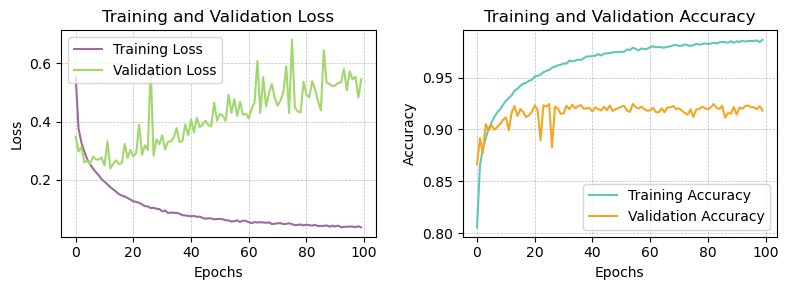

313/313 - 2s - 6ms/step - accuracy: 0.9155 - loss: 0.6305
Test Accuracy: 91.550%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


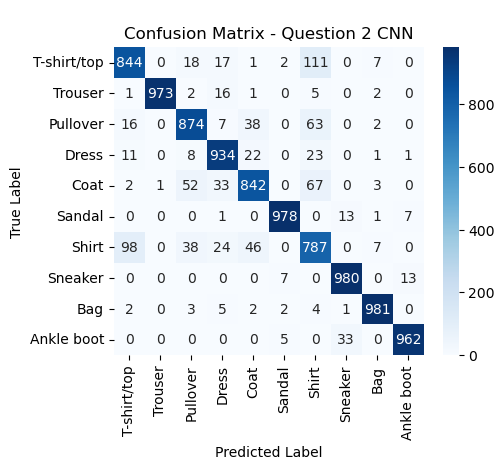


Classification Report for Question 2 CNN:
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.84      0.86      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.88      0.87      0.88      1000
       Dress       0.90      0.93      0.92      1000
        Coat       0.88      0.84      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.74      0.79      0.76      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [35]:
# Question 2: CNN with Batch Normalization and Dropout

# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load and preprocess Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize images to [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add channel dimension to images for CNN compatibility
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# One-hot encode labels
train_labels_categorical = to_categorical(train_labels, 10)
test_labels_categorical = to_categorical(test_labels, 10)

# Define the CNN model
def build_q2_cnn():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),  # Explicit input layer specifying the input shape
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Build and train the model
q2_cnn = build_q2_cnn()
q2_cnn_history = q2_cnn.fit(
    train_images, 
    train_labels_categorical, 
    epochs=100, 
    validation_split=0.1, 
    batch_size=64, 
    verbose=2
)

# Plot the training curves
plot_training_curves(q2_cnn_history)

# Evaluate the model on test data
q2_cnn_test_loss, q2_cnn_test_accuracy = q2_cnn.evaluate(test_images, test_labels_categorical, verbose=2)
print(f"Test Accuracy: {q2_cnn_test_accuracy * 100:.3f}%")

# Generate predictions
q2_predictions = q2_cnn.predict(test_images)
q2_pred_labels = np.argmax(q2_predictions, axis=1)

# Confusion matrix and classification report
q2_conf_matrix = confusion_matrix(test_labels, q2_pred_labels)
q2_report = classification_report(
    test_labels, 
    q2_pred_labels, 
    target_names=[
        'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ]
)

# Visualize confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(q2_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    yticklabels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.title("\nConfusion Matrix - Question 2 CNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print the classification report
print("\nClassification Report for Question 2 CNN:")
print(q2_report)